In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/kaggle/input/fertilizer-prediction-dataset/Fertilizer Prediction.csv")

# Pre-processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [4]:
has_inf = (df.replace([np.inf, -np.inf], np.nan).isna()).any().any()

if has_inf:
    print("The DataFrame contains infinite values.")
else:
    print("No infinite values found.")


No infinite values found.


In [5]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [6]:
# Rename the column with the correct spelling
df.rename(columns={'Temparature': 'Temperature'}, inplace=True)

In [7]:
print(df.columns)

Index(['Temperature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [8]:
df.columns = df.columns.str.strip()

In [9]:
# Loop through object (categorical) columns and print unique values
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 50)


Unique values in 'Soil Type':
['Sandy' 'Loamy' 'Black' 'Red' 'Clayey']
--------------------------------------------------
Unique values in 'Crop Type':
['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts']
--------------------------------------------------
Unique values in 'Fertilizer Name':
['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26']
--------------------------------------------------


In [10]:
df.duplicated().sum()


0

# EDA

In [11]:
# Summary of numeric features
df.describe()


,Temperature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


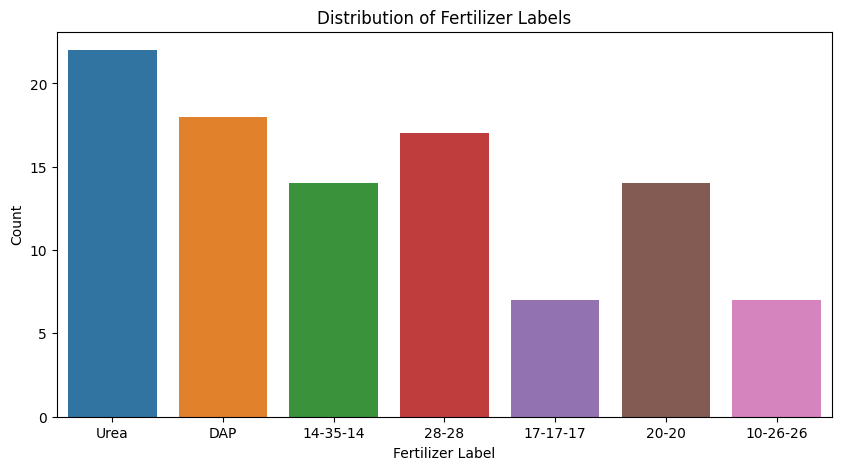

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='Fertilizer Name', data=df)
plt.title('Distribution of Fertilizer Labels')
plt.xlabel('Fertilizer Label')
plt.ylabel('Count')
plt.show()


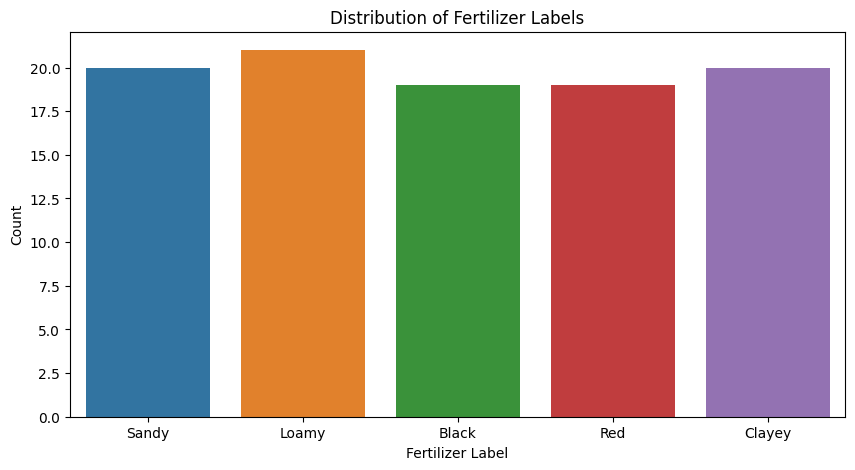

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='Soil Type', data=df)
plt.title('Distribution of Fertilizer Labels')
plt.xlabel('Fertilizer Label')
plt.ylabel('Count')
plt.show()


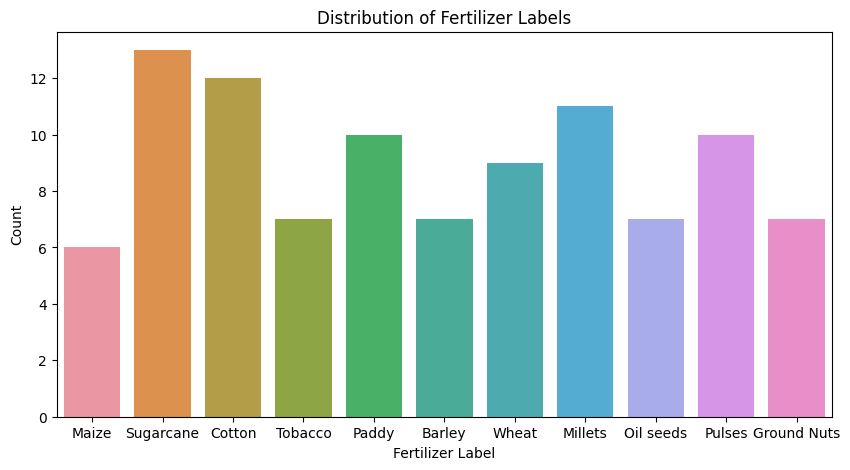

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='Crop Type', data=df)
plt.title('Distribution of Fertilizer Labels')
plt.xlabel('Fertilizer Label')
plt.ylabel('Count')
plt.show()


In [15]:
num_cols = ['Temperature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
categorical_cols = ["Soil Type", "Crop Type"]

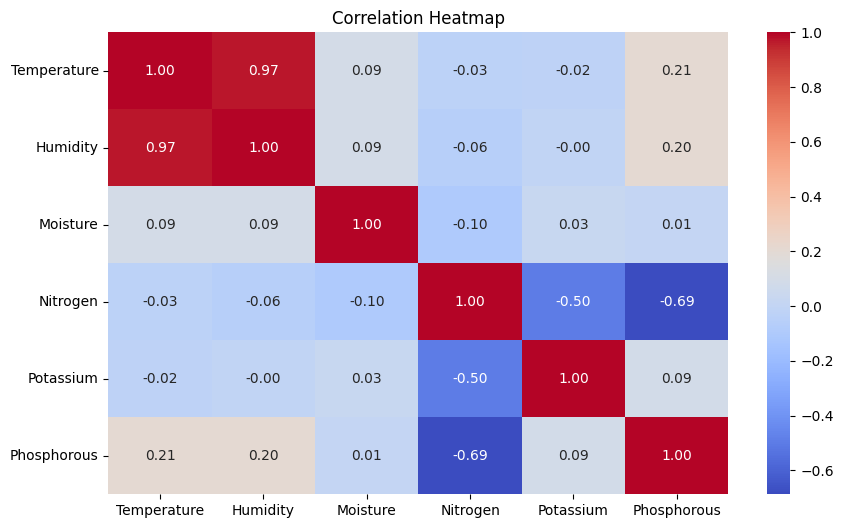

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [17]:
corr_matrix = df[num_cols].corr().abs()
print(corr_matrix.isna().sum())

Temperature    0
Humidity       0
Moisture       0
Nitrogen       0
Potassium      0
Phosphorous    0
dtype: int64


In [18]:
# Set correlation threshold
threshold = 0.9


# Identify columns to drop
to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[j]
            to_drop.add(colname)

print(f"Columns to drop: {to_drop}")

# Drop the identified columns
df = df.drop(columns=to_drop)

print("Updated DataFrame after dropping highly correlated columns:")
print(df.head())


Columns to drop: {'Humidity'}
Updated DataFrame after dropping highly correlated columns:
   Temperature  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26        38     Sandy      Maize        37          0   
1           29        45     Loamy  Sugarcane        12          0   
2           34        62     Black     Cotton         7          9   
3           32        34       Red    Tobacco        22          0   
4           28        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea  


In [19]:
num_cols = ['Temperature', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

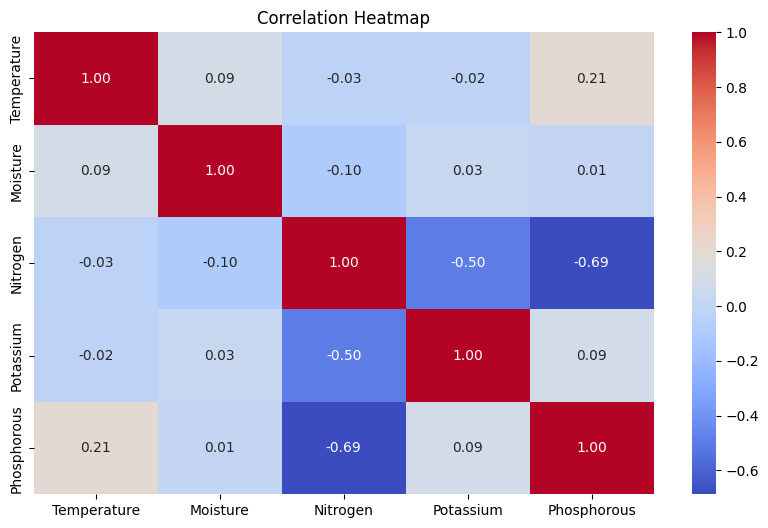

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


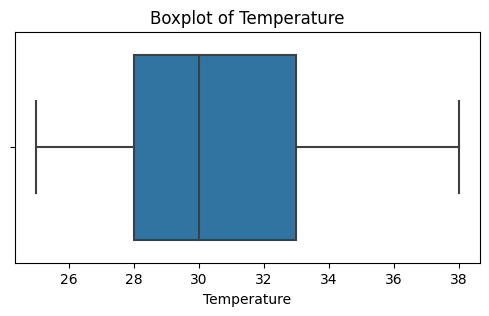

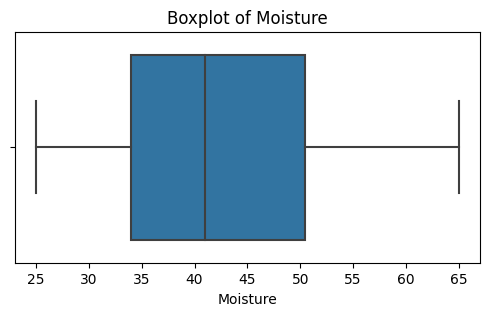

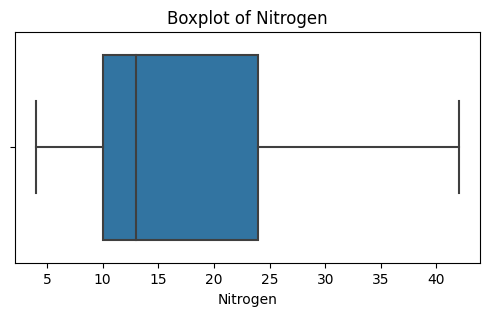

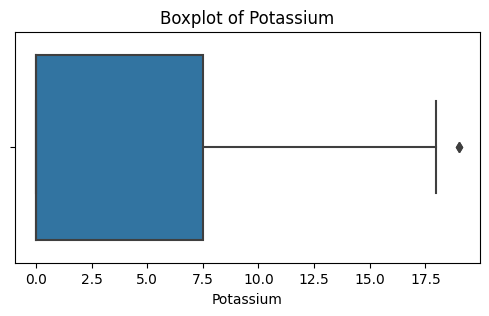

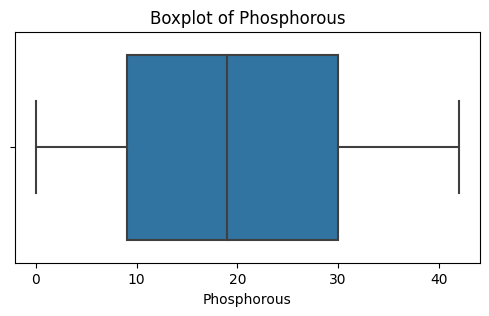

In [21]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [23]:
import warnings
warnings.filterwarnings('ignore')

<Figure size 2100x1700 with 0 Axes>

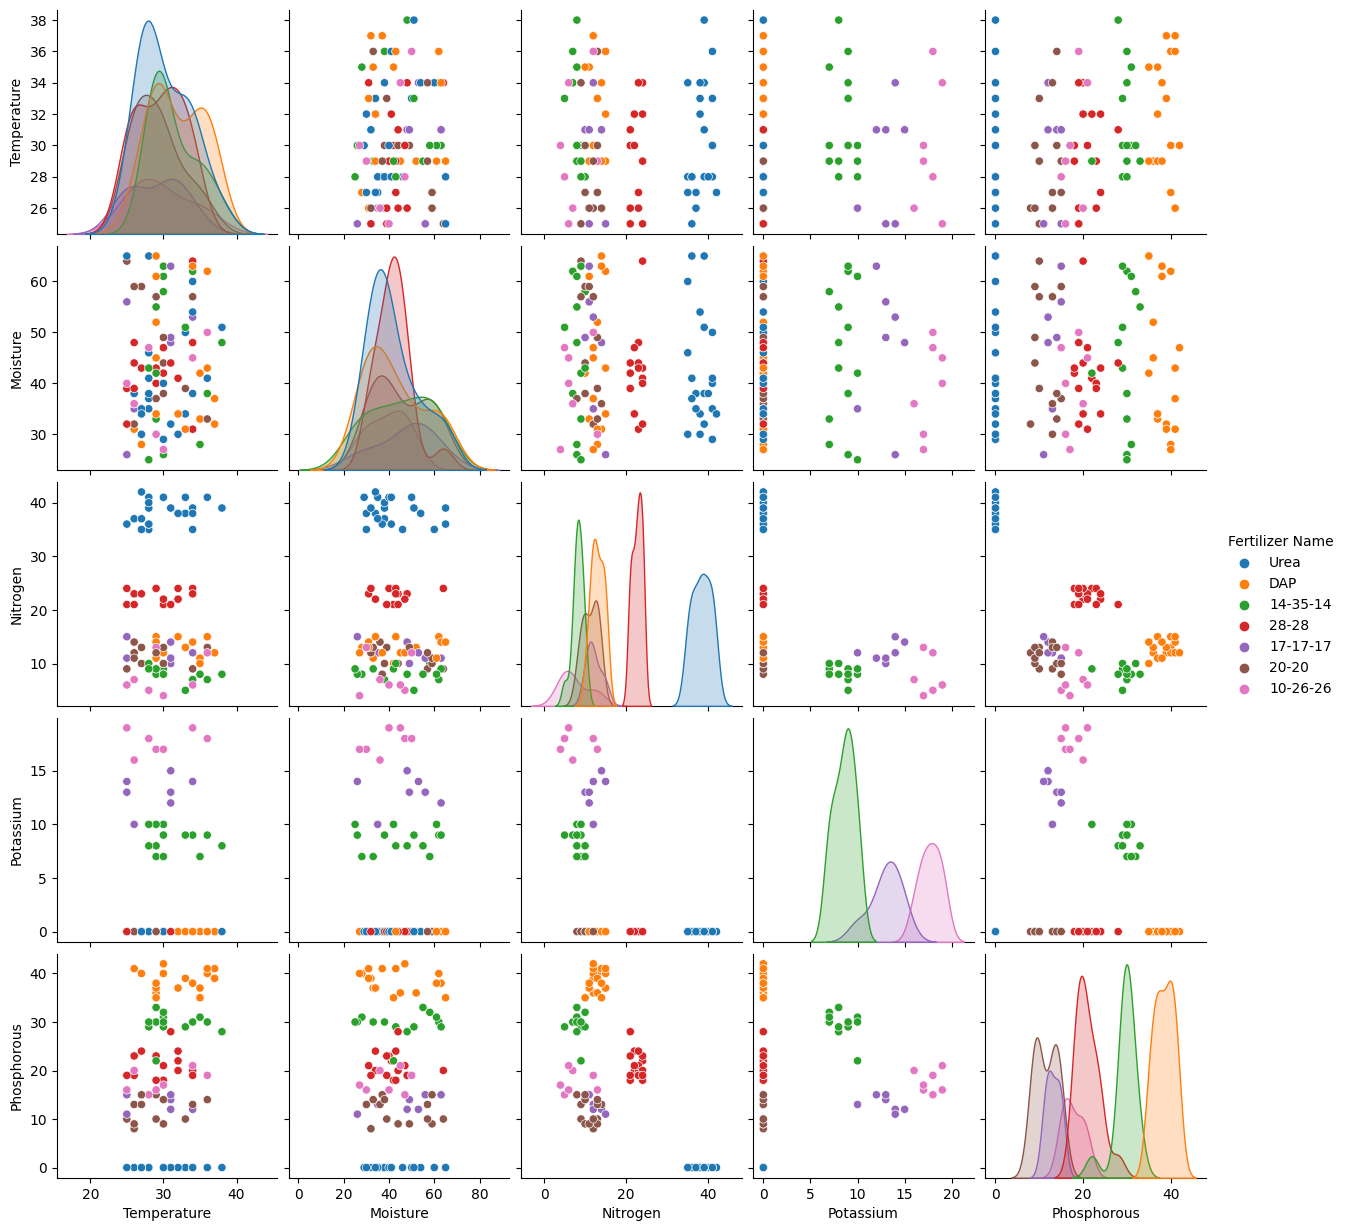

In [24]:
# Can take time but shows great insight
plt.figure(figsize=(21,17))
sns.pairplot(df[num_cols + ["Fertilizer Name"]], hue = "Fertilizer Name")
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temperature      99 non-null     int64 
 1   Moisture         99 non-null     int64 
 2   Soil Type        99 non-null     object
 3   Crop Type        99 non-null     object
 4   Nitrogen         99 non-null     int64 
 5   Potassium        99 non-null     int64 
 6   Phosphorous      99 non-null     int64 
 7   Fertilizer Name  99 non-null     object
dtypes: int64(5), object(3)
memory usage: 6.3+ KB


# Encoding

In [26]:
X = df.drop(columns=["Fertilizer Name"])
y = df["Fertilizer Name"]

In [27]:
X.shape

(99, 7)

In [28]:
X_encoded = pd.get_dummies(X, columns=["Soil Type", "Crop Type"], drop_first=True)

In [29]:
X_encoded.shape

(99, 19)

In [30]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Temperature            99 non-null     int64
 1   Moisture               99 non-null     int64
 2   Nitrogen               99 non-null     int64
 3   Potassium              99 non-null     int64
 4   Phosphorous            99 non-null     int64
 5   Soil Type_Clayey       99 non-null     bool 
 6   Soil Type_Loamy        99 non-null     bool 
 7   Soil Type_Red          99 non-null     bool 
 8   Soil Type_Sandy        99 non-null     bool 
 9   Crop Type_Cotton       99 non-null     bool 
 10  Crop Type_Ground Nuts  99 non-null     bool 
 11  Crop Type_Maize        99 non-null     bool 
 12  Crop Type_Millets      99 non-null     bool 
 13  Crop Type_Oil seeds    99 non-null     bool 
 14  Crop Type_Paddy        99 non-null     bool 
 15  Crop Type_Pulses       99 non-null     boo

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"Reduced shape after PCA: {X_pca.shape}")


Original shape: (99, 19)
Reduced shape after PCA: (99, 2)


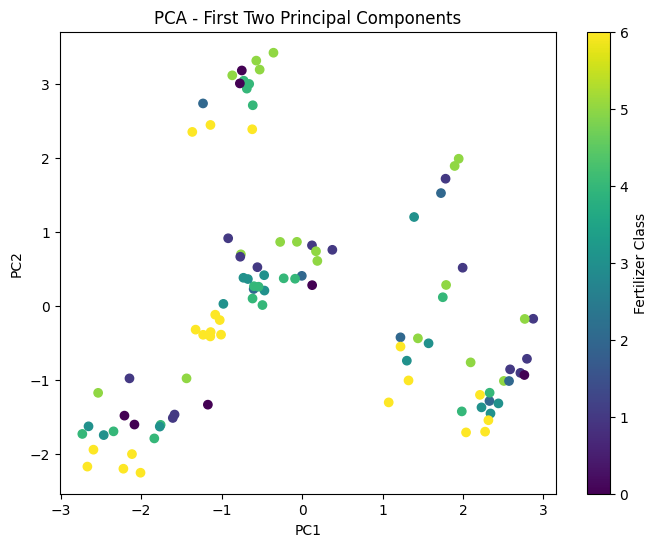

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype('category').cat.codes, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First Two Principal Components")
plt.colorbar(label="Fertilizer Class")
plt.show()


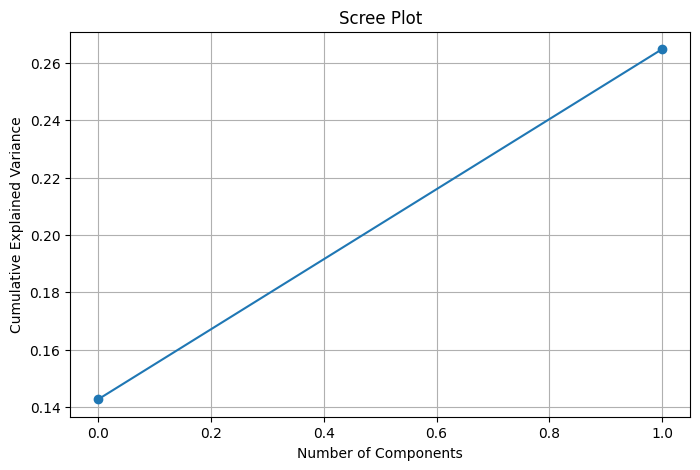

In [34]:
import numpy as np

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)  # now y will be integers

In [36]:
print(le.classes_)

['10-26-26' '14-35-14' '17-17-17' '20-20' '28-28' 'DAP' 'Urea']


# Train-test split

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
px_train, px_test, py_train, py_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [54]:
scaler = StandardScaler()
scaler2 = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
px_train = scaler2.fit_transform(px_train)
px_test = scaler2.transform(px_test)

# Modelling using GridSearch CV

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.tight_layout()
    plt.show()


In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import joblib
import warnings
warnings.filterwarnings("ignore")

# Models and parameters
models_params = {
    'Naive Bayes': (GaussianNB(), {}),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    }),
    'SVM': (SVC(), {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear']
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7]
    }),
    'Logistic Regression': (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), {
        'n_estimators': [100, 200],
        'max_depth': [3, 5]
    })
}



Evaluating models on Original data

Training Naive Bayes on Original data...
Best Parameters for Naive Bayes on Original: {}

Naive Bayes (Original) Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.17      1.00      0.29         1
           4       0.67      0.80      0.73         5
           5       1.00      0.60      0.75         5
           6       1.00      0.17      0.29         6

    accuracy                           0.50        20
   macro avg       0.55      0.44      0.39        20
weighted avg       0.82      0.50      0.54        20



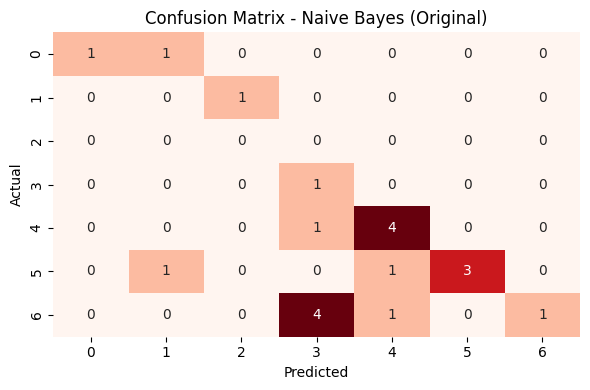


Training Random Forest on Original data...
Best Parameters for Random Forest on Original: {'max_depth': 20, 'n_estimators': 200}

Random Forest (Original) Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



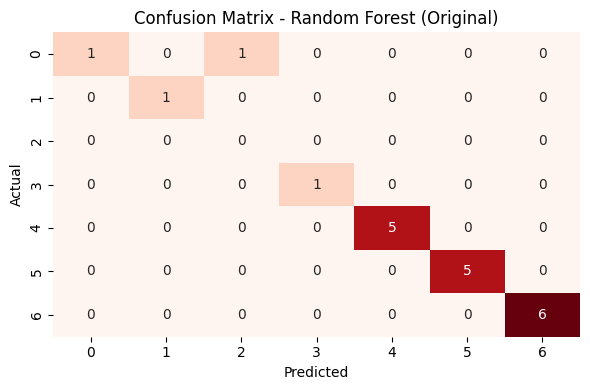


Training SVM on Original data...
Best Parameters for SVM on Original: {'C': 1, 'kernel': 'linear'}

SVM (Original) Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



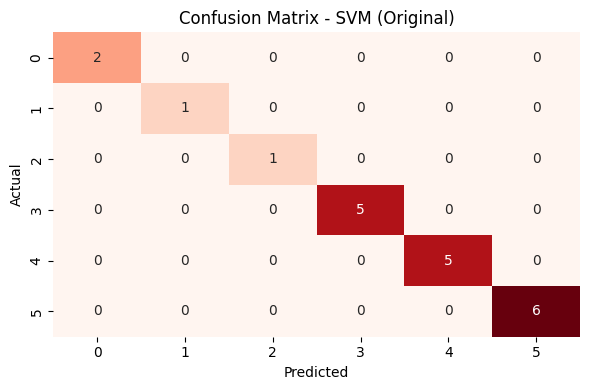


Training KNN on Original data...
Best Parameters for KNN on Original: {'n_neighbors': 7}

KNN (Original) Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.33      0.40      0.36         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         6

    accuracy                           0.15        20
   macro avg       0.14      0.15      0.14        20
weighted avg       0.13      0.15      0.14        20



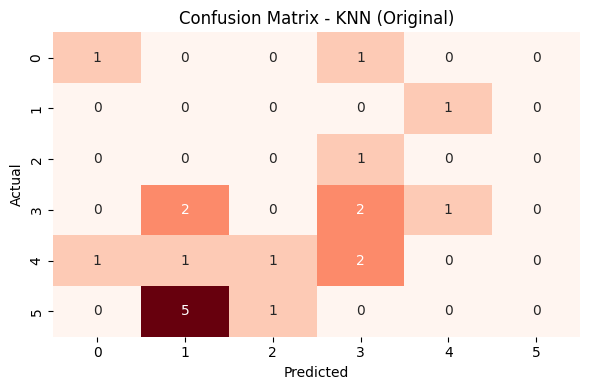


Training Logistic Regression on Original data...
Best Parameters for Logistic Regression on Original: {'C': 10}

Logistic Regression (Original) Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



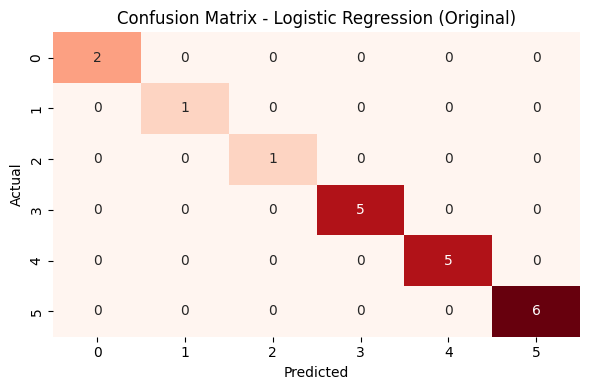


Training XGBoost on Original data...
Best Parameters for XGBoost on Original: {'max_depth': 5, 'n_estimators': 200}

XGBoost (Original) Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



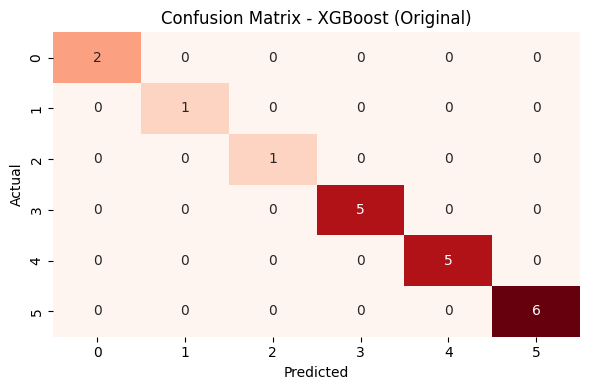


Evaluating models on PCA data

Training Naive Bayes on PCA data...
Best Parameters for Naive Bayes on PCA: {}

Naive Bayes (PCA) Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.50      0.60      0.55         5
           6       0.25      0.17      0.20         6

    accuracy                           0.20        20
   macro avg       0.12      0.13      0.12        20
weighted avg       0.20      0.20      0.20        20



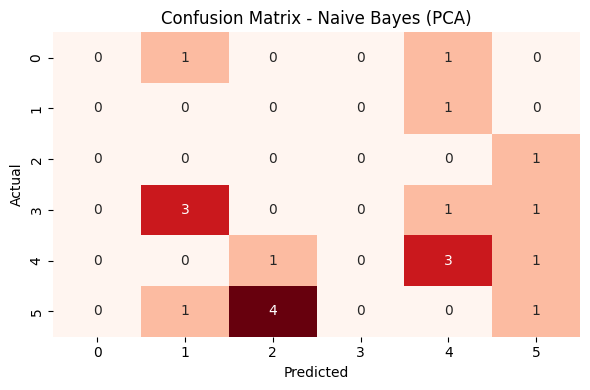


Training Random Forest on PCA data...
Best Parameters for Random Forest on PCA: {'max_depth': 10, 'n_estimators': 100}

Random Forest (PCA) Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.50      0.20      0.29         5
           5       0.40      0.40      0.40         5
           6       1.00      0.67      0.80         6

    accuracy                           0.35        20
   macro avg       0.27      0.18      0.21        20
weighted avg       0.53      0.35      0.41        20



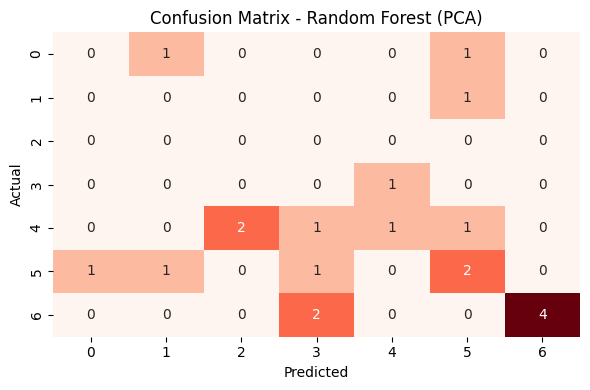


Training SVM on PCA data...
Best Parameters for SVM on PCA: {'C': 10, 'kernel': 'rbf'}

SVM (PCA) Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.20      0.20      0.20         5
           6       0.67      0.67      0.67         6

    accuracy                           0.25        20
   macro avg       0.14      0.14      0.14        20
weighted avg       0.25      0.25      0.25        20



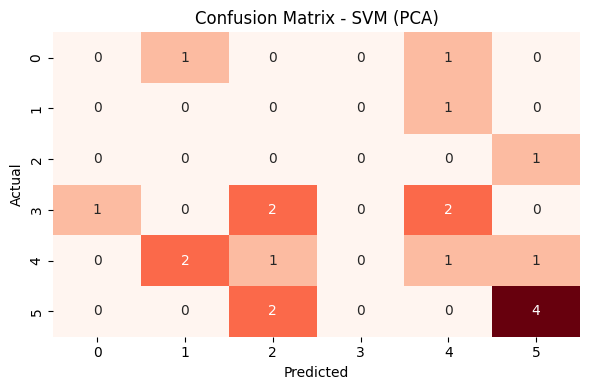


Training KNN on PCA data...
Best Parameters for KNN on PCA: {'n_neighbors': 5}

KNN (PCA) Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.33      0.20      0.25         5
           5       0.25      0.20      0.22         5
           6       1.00      0.67      0.80         6

    accuracy                           0.30        20
   macro avg       0.26      0.18      0.21        20
weighted avg       0.45      0.30      0.36        20



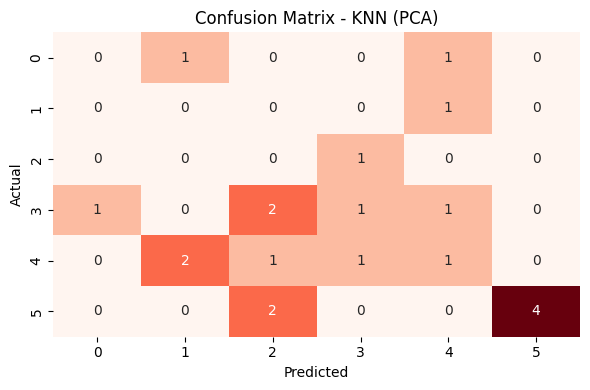


Training Logistic Regression on PCA data...
Best Parameters for Logistic Regression on PCA: {'C': 1}

Logistic Regression (PCA) Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.43      0.60      0.50         5
           6       0.44      0.67      0.53         6

    accuracy                           0.35        20
   macro avg       0.15      0.21      0.17        20
weighted avg       0.24      0.35      0.29        20



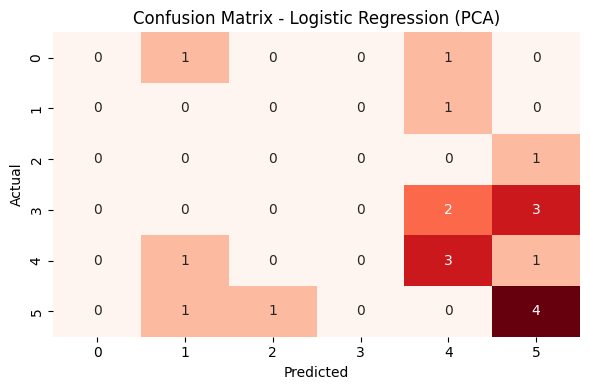


Training XGBoost on PCA data...
Best Parameters for XGBoost on PCA: {'max_depth': 5, 'n_estimators': 100}

XGBoost (PCA) Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.50      0.20      0.29         5
           5       0.75      0.60      0.67         5
           6       0.80      0.67      0.73         6

    accuracy                           0.40        20
   macro avg       0.29      0.21      0.24        20
weighted avg       0.55      0.40      0.46        20



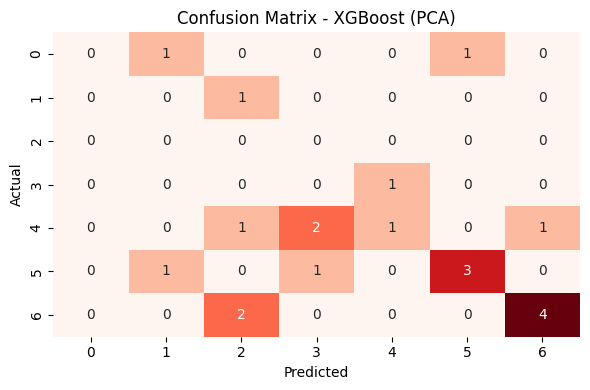

In [43]:
def evaluate_models(X_train, X_test, y_train, y_test, label):
    results = []

    print(f"\n{'='*30}\nEvaluating models on {label} data\n{'='*30}")
    
    for name, (model, params) in models_params.items():
        print(f"\nTraining {name} on {label} data...")
        clf = GridSearchCV(model, params, cv=5, n_jobs=-1, scoring='accuracy')
        clf.fit(X_train, y_train)

        best_model = clf.best_estimator_
        y_pred = best_model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f"Best Parameters for {name} on {label}: {clf.best_params_}")
        print(f"\n{name} ({label}) Classification Report:\n")
        print(classification_report(y_test, y_pred))
        plot_conf_matrix(y_test, y_pred, f"{name} ({label})")

        results.append({
            'Model': name,
            'Data': label,
            'Best Params': clf.best_params_,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1-score': f1,
            'Classifier': best_model
        })

    return results

# Evaluate on both original and PCA data
original_results = evaluate_models(x_train, x_test, y_train, y_test, label="Original")
pca_results = evaluate_models(px_train, px_test, py_train, py_test, label="PCA")

# Combine results
all_results = pd.DataFrame(original_results + pca_results).drop(columns='Classifier')


# Comparsion

In [44]:
summary_df = pd.DataFrame(all_results).drop(columns=['Best Params'])
print("\n🔍 Model Performance Summary:\n")
print(summary_df.sort_values(by='Accuracy', ascending=False).to_string(index=False))


🔍 Model Performance Summary:

              Model     Data  Accuracy  Precision  Recall  F1-score
                SVM Original      1.00   1.000000    1.00  1.000000
Logistic Regression Original      1.00   1.000000    1.00  1.000000
            XGBoost Original      1.00   1.000000    1.00  1.000000
      Random Forest Original      0.95   1.000000    0.95  0.966667
        Naive Bayes Original      0.50   0.825000    0.50  0.535985
            XGBoost      PCA      0.40   0.552500    0.40  0.456277
      Random Forest      PCA      0.35   0.525000    0.35  0.411429
Logistic Regression      PCA      0.35   0.240476    0.35  0.285000
                KNN      PCA      0.30   0.445833    0.30  0.358056
                SVM      PCA      0.25   0.250000    0.25  0.250000
        Naive Bayes      PCA      0.20   0.200000    0.20  0.196364
                KNN Original      0.15   0.133333    0.15  0.140909


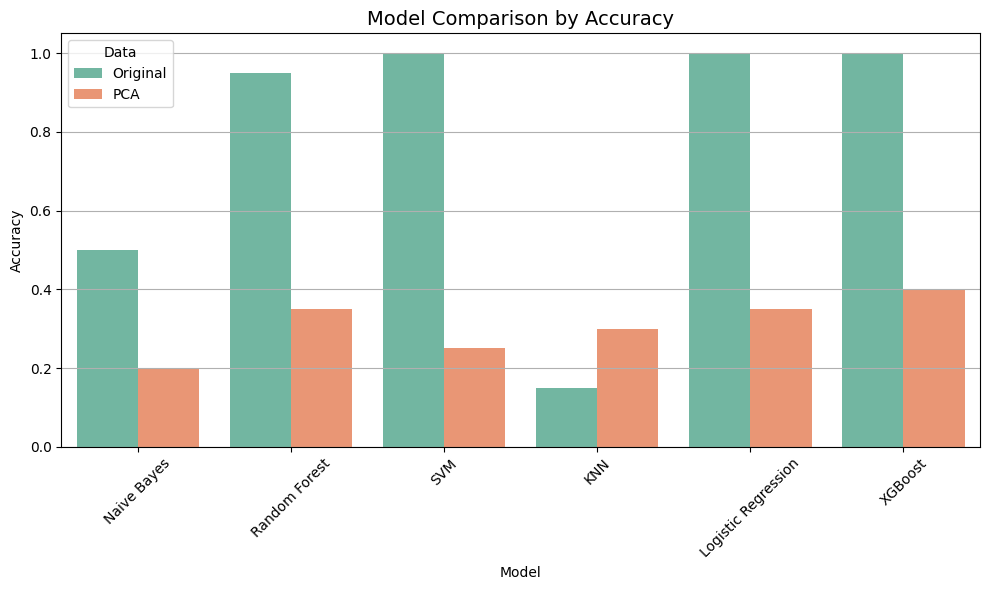

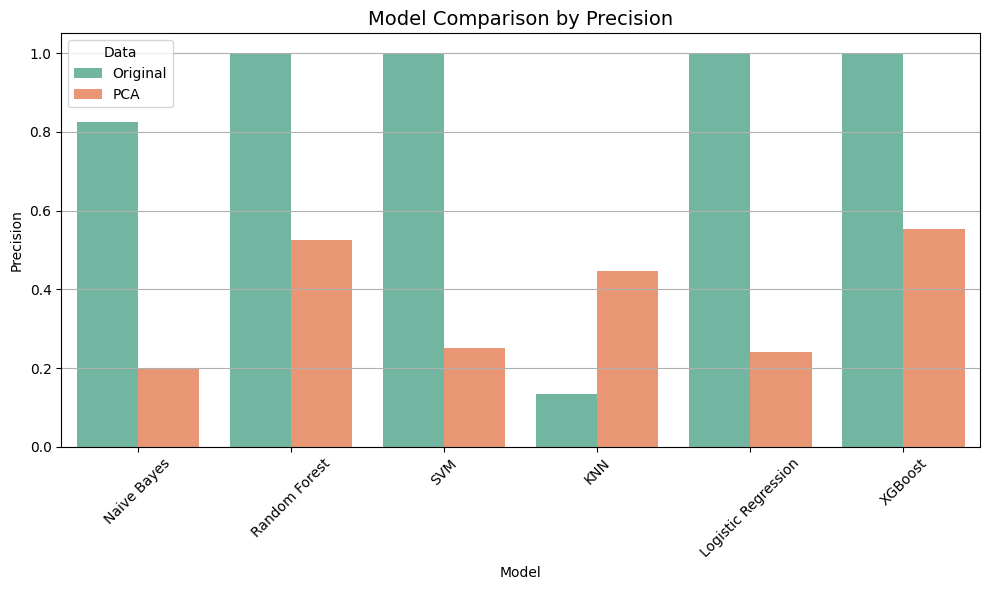

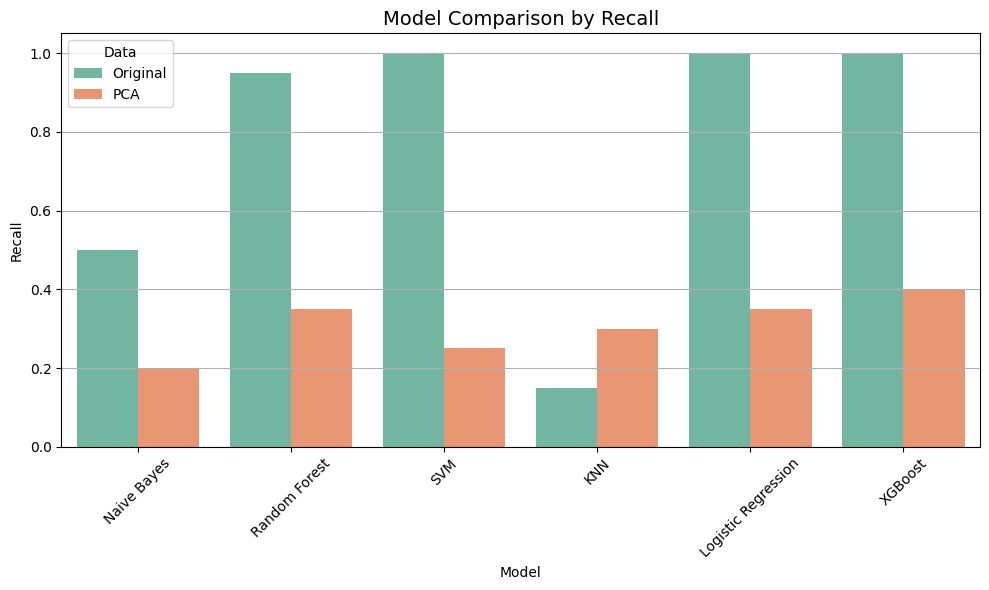

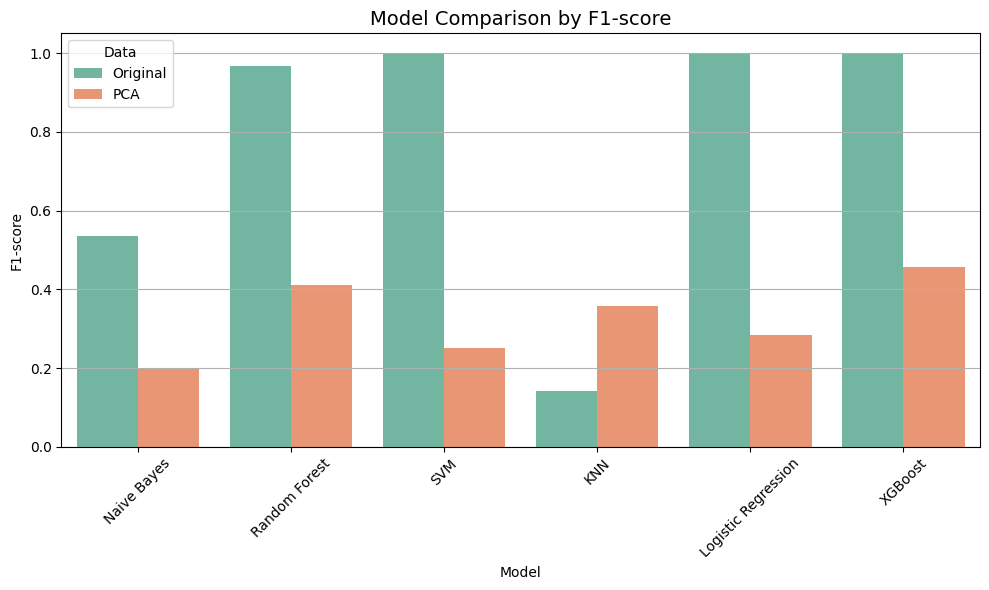

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_metric_comparison(df, metric, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='Model', y=metric, hue='Data', palette='Set2')
    plt.title(title, fontsize=14)
    plt.ylabel(metric)
    plt.ylim(0, 1.05)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(title='Data')
    plt.grid(axis='y')
    plt.show()

# Plot each metric
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score']:
    plot_metric_comparison(summary_df, metric, f'Model Comparison by {metric}')


# Conclusion

#### **Top Performing Models (on Original Data)**
The following models achieved **perfect classification (100%)** on the original dataset:

| Model                | Accuracy | F1-Score |
|---------------------|----------|----------|
| **SVM**             | 1.00     | 1.000    |
| **Logistic Regression** | 1.00     | 1.000    |
| **XGBoost**         | 1.00     | 1.000    |

These models are clearly the best candidates for deployment, showing both **high precision and generalization** on the test set (although be cautious of overfitting – verify with cross-validation or external validation set if possible).

### Recommendation for Backend Deployment

- Choose **SVM, Logistic Regression**, or **XGBoost trained on original data**.
-  Avoid using PCA-reduced data for final model training unless further tuning or feature selection is done.
-  If interpretability matters, **Logistic Regression** may be preferable. For performance, **XGBoost** is powerful.

In [46]:
# Get the SVM model trained on original data
svm_model = next(model['Classifier'] for model in original_results if model['Model'] == 'SVM')

In [55]:
import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [47]:
joblib.dump(svm_model, 'svm_model_original.pkl')
print("✅ SVM model saved to 'svm_model_original.pkl'")

✅ SVM model saved to 'svm_model_original.pkl'


In [57]:
sample_features = np.array([[26, 45, 80, 40, 30,    # numerical values
                             0, 1, 0, 0,             # soil one-hot (Black dropped)
                             0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])  # crop one-hot (Barley dropped)

# Scale the features
scaled_features = scaler.transform(sample_features)

# Predict the fertilizer
prediction = svm_model.predict(scaled_features)
print("Recommended Fertilizer:", prediction[0])

Recommended Fertilizer: 2
